## Import Leone Data, Fit, and Plot

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


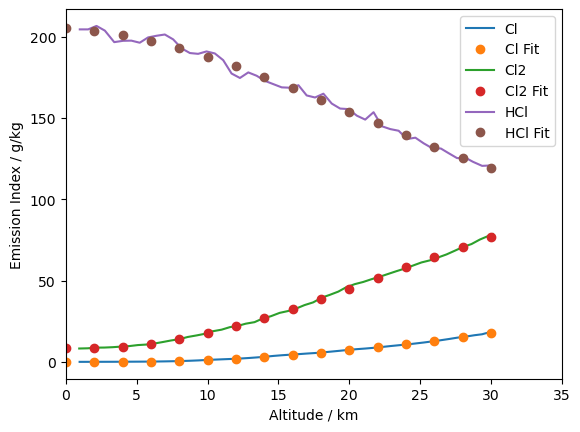

In [1]:
# Import data from csv
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.optimize import curve_fit

chlorine_file = np.genfromtxt("./chlorine_Leone.csv",
                    delimiter=",",skip_header=1)

alt_cl  = chlorine_file[:,0]
ei_cl   = chlorine_file[:,1]
alt_cl2 = chlorine_file[:,2]
ei_cl2  = chlorine_file[:,3]
alt_hcl = chlorine_file[:,4]
ei_hcl  = chlorine_file[:,5]

# Fit a polynomial to each Leone profile
xn = np.arange(0,32,2)
yn_cl  = np.poly1d(np.polyfit(alt_cl[~np.isnan(alt_cl)],ei_cl[~np.isnan(ei_cl)],3))
yn_cl2 = np.poly1d(np.polyfit(alt_cl2[~np.isnan(alt_cl2)],ei_cl2[~np.isnan(ei_cl2)],3))
yn_hcl = np.poly1d(np.polyfit(alt_hcl[~np.isnan(alt_hcl)],ei_hcl[~np.isnan(ei_hcl)],3))

plt.plot(alt_cl,ei_cl,label="Cl")
plt.plot(xn,yn_cl(xn),'o',label="Cl Fit")
plt.plot(alt_cl2,ei_cl2,label="Cl2")
plt.plot(xn,yn_cl2(xn),'o',label="Cl2 Fit")
plt.plot(alt_hcl,ei_hcl,label="HCl")
plt.plot(xn,yn_hcl(xn),'o',label="HCl Fit")
plt.xlim(0,35)
plt.xlabel("Altitude / km")
plt.ylabel("Emission Index / g/kg")
plt.legend()

## Add Gomberg, Zittel, Denison, Paoli Data

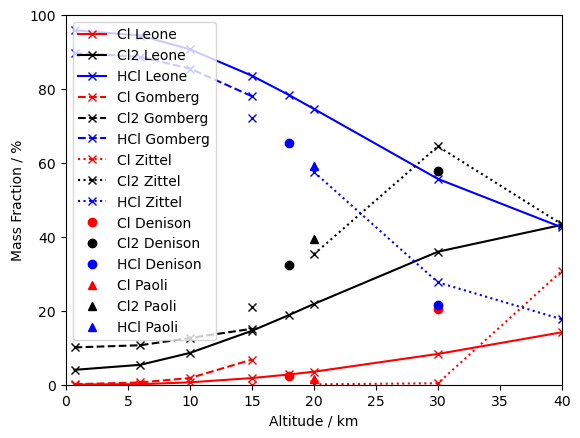

In [2]:
alt_lit = np.asarray([0.7,6,10,15,18,20,30,40])
mass_frac_cl = np.zeros_like(alt_lit)
mass_frac_cl2 = np.zeros_like(alt_lit)
mass_frac_hcl = np.zeros_like(alt_lit)
for count, alt in enumerate(alt_lit):
    mass_frac_cl[count] = yn_cl(alt)/(yn_cl(alt)+yn_cl2(alt)+yn_hcl(alt)) * 100
    mass_frac_cl2[count] = yn_cl2(alt)/(yn_cl(alt)+yn_cl2(alt)+yn_hcl(alt)) * 100
    mass_frac_hcl[count] = yn_hcl(alt)/(yn_cl(alt)+yn_cl2(alt)+yn_hcl(alt)) * 100

denison_total_18 = 2.55 + 36.57 + 73.76
denison_total_30 = 20.60 + 21.54 + 57.88
paoli_cl_mass = 0.02 * 35.453
paoli_cl2_mass = 0.25 * 35.453 * 2
paoli_hcl_mass = 0.73 * (35.453 + 1.008)
paoli_total_20 = paoli_cl_mass + paoli_cl2_mass + paoli_hcl_mass

gomberg_hcl = [89.75,88.69,85.54,78.06,np.nan,np.nan,np.nan,np.nan]
gomberg_cl2 = [10.1,10.68,12.65,15.13,np.nan,np.nan,np.nan,np.nan]
gomberg_cl  = [0.14,0.62,1.8,6.8,np.nan,np.nan,np.nan,np.nan]
zittel_cl   = [np.nan,np.nan,np.nan,0.01,np.nan,0.1,0.4,30.8]
zittel_cl2  = [np.nan,np.nan,np.nan,21,np.nan,35.3,64.5,43.4]
zittel_hcl  = [np.nan,np.nan,np.nan,72.2,np.nan,57.6,27.7,17.7]
denison_hcl = [np.nan,np.nan,np.nan,np.nan,73.76/denison_total_18*100,np.nan,21.54/denison_total_30*100,np.nan]
denison_cl2 = [np.nan,np.nan,np.nan,np.nan,36.57/denison_total_18*100,np.nan,57.88/denison_total_30*100,np.nan]
denison_cl  = [np.nan,np.nan,np.nan,np.nan,2.55/denison_total_18*100,np.nan,20.60/denison_total_30*100,np.nan]
paoli_hcl = [np.nan,np.nan,np.nan,np.nan,np.nan,paoli_hcl_mass/paoli_total_20*100,np.nan,np.nan]
paoli_cl2 = [np.nan,np.nan,np.nan,np.nan,np.nan,paoli_cl2_mass/paoli_total_20*100,np.nan,np.nan]
paoli_cl  = [np.nan,np.nan,np.nan,np.nan,np.nan,paoli_cl_mass/paoli_total_20*100,np.nan,np.nan]

plt.plot(alt_lit,mass_frac_cl,'-xr',label="Cl Leone")
plt.plot(alt_lit,mass_frac_cl2,'-xk',label="Cl2 Leone")
plt.plot(alt_lit,mass_frac_hcl,'-xb',label="HCl Leone")
plt.plot(alt_lit,gomberg_cl,'--xr',label="Cl Gomberg")
plt.plot(alt_lit,gomberg_cl2,'--xk',label="Cl2 Gomberg")
plt.plot(alt_lit,gomberg_hcl,'--xb',label="HCl Gomberg")
plt.plot(alt_lit,zittel_cl,':xr',label="Cl Zittel")
plt.plot(alt_lit,zittel_cl2,':xk',label="Cl2 Zittel")
plt.plot(alt_lit,zittel_hcl,':xb',label="HCl Zittel")
plt.plot(alt_lit,denison_cl,'or',label="Cl Denison")
plt.plot(alt_lit,denison_cl2,'ok',label="Cl2 Denison")
plt.plot(alt_lit,denison_hcl,'ob',label="HCl Denison")
plt.plot(alt_lit,paoli_cl,'^r',label="Cl Paoli")
plt.plot(alt_lit,paoli_cl2,'^k',label="Cl2 Paoli")
plt.plot(alt_lit,paoli_hcl,'^b',label="HCl Paoli")
plt.xlim(0,40)
plt.ylim(0,100)
plt.xlabel("Altitude / km")
plt.ylabel("Mass Fraction / %")
plt.legend()

# Create an average of all of the data

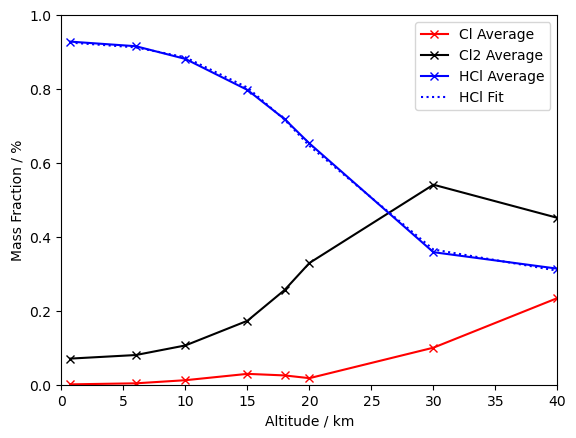

In [3]:
mass_frac_cl_average = np.zeros_like(alt_lit)
mass_frac_cl2_average = np.zeros_like(alt_lit)
mass_frac_hcl_average = np.zeros_like(alt_lit)
for count, alt in enumerate(alt_lit):
    mass_frac_cl_average[count] = np.nanmean([mass_frac_cl[count],gomberg_cl[count],zittel_cl[count],denison_cl[count],paoli_cl[count]])
    mass_frac_cl2_average[count] = np.nanmean([mass_frac_cl2[count],gomberg_cl2[count],zittel_cl2[count],denison_cl2[count],paoli_cl2[count]])
    mass_frac_hcl_average[count] = np.nanmean([mass_frac_hcl[count],gomberg_hcl[count],zittel_hcl[count],denison_hcl[count],paoli_hcl[count]])

    # Make sure the mass fractions still total 100% (minor changes).
    total_mass_frac = (mass_frac_cl_average[count] + mass_frac_cl2_average[count] + mass_frac_hcl_average[count])
    mass_frac_cl_average[count] = mass_frac_cl_average[count] / total_mass_frac * 1
    mass_frac_cl2_average[count] = mass_frac_cl2_average[count] / total_mass_frac * 1
    mass_frac_hcl_average[count] = mass_frac_hcl_average[count] / total_mass_frac * 1 
    
# Fit an exponential curve to mass fraction vs. atmospheric pressure
def test(x, a, b, c, d):
    return a / (1+np.exp(b*(x-c))) + d 

param_hcl, _ = curve_fit(test, alt_lit, mass_frac_hcl_average)
param_hcl = [0.629, 0.237, 20.8, 0.302]
plt.plot(alt_lit,mass_frac_cl_average,'-xr',label="Cl Average")
plt.plot(alt_lit,mass_frac_cl2_average,'-xk',label="Cl2 Average")
plt.plot(alt_lit,mass_frac_hcl_average,'-xb',label="HCl Average")
plt.plot(alt_lit,test(alt_lit, param_hcl[0], param_hcl[1], param_hcl[2], param_hcl[3]),':b',label="HCl Fit")  
plt.xlim(0,40)
plt.ylim(0,1)
plt.xlabel("Altitude / km")
plt.ylabel("Mass Fraction / %")
plt.legend()

## Extend the fits over 0-80km

[0.627, 0.226, 20.9, 0.304]


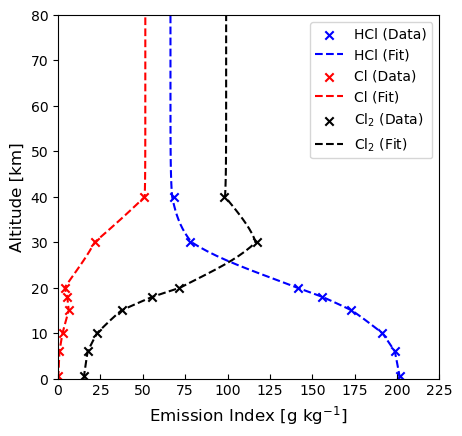

In [4]:
# Extend the relationship from 0-80 km.
alt_extended = np.arange(81,dtype=float)
mass_frac_hcl = test(alt_extended, param_hcl[0], param_hcl[1], param_hcl[2], param_hcl[3])
mass_frac_cl2 = np.interp(alt_extended,alt_lit,mass_frac_cl2_average)
mass_frac_cl  = np.interp(alt_extended,alt_lit,mass_frac_cl_average)

# Make sure the mass fractions still total 100% (minor changes).
for count, alt in enumerate(alt_extended):
    total_mass_frac = (mass_frac_cl[count] + mass_frac_cl2[count] + mass_frac_hcl[count])
    mass_frac_cl[count] = mass_frac_cl[count] / total_mass_frac * 1
    mass_frac_cl2[count] = mass_frac_cl2[count] / total_mass_frac * 1
    mass_frac_hcl[count] = mass_frac_hcl[count] / total_mass_frac * 1 
    
#param_hcl_updated, _ = curve_fit(test, alt_extended, mass_frac_hcl)
param_hcl_updated = [0.627, 0.226, 20.9, 0.304]
print(param_hcl_updated)

mass_frac_cl2_new, mol_hcl, mol_cl, mol_cl2, total_mol = [], [], [] ,[], []
for count, alt in enumerate(alt_extended):
    mol_hcl.append(mass_frac_hcl[count] / 35.453)
    mol_cl2.append(mass_frac_cl2[count] / 35.453)
    mol_cl.append(mass_frac_cl[count] / 35.453)
    total_mol.append(mol_hcl[-1] + mol_cl2[-1] + mol_cl[-1])   

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(12.5/2.54,12/2.54)) 
ax.scatter(mass_frac_hcl_average*217,alt_lit,color='b',marker="x",label="HCl (Data)")
ax.plot(mass_frac_hcl*217,alt_extended,'--b',label="HCl (Fit)")
ax.scatter(mass_frac_cl_average*217, alt_lit,color='r',marker="x",label="Cl (Data)")
ax.plot(mass_frac_cl*217, alt_extended,'--r',label="Cl (Fit)")
ax.scatter(mass_frac_cl2_average*217,alt_lit,color='k',marker="x",label="Cl$_2$ (Data)")
ax.plot(mass_frac_cl2*217,alt_extended,'--k',label="Cl$_2$ (Fit)")
ax.set_xlim(0,225)
ax.set_xticks(np.arange(0,250,25))
ax.set_xticklabels(np.arange(0,250,25),fontsize=10)
ax.tick_params(axis="x",direction="in")
ax.set_ylim(0,80)
ax.set_yticks(np.arange(0,90,10))
ax.set_yticklabels(np.arange(0,90,10),fontsize=10)
ax.set_xlabel("Emission Index [g kg$^{-1}$]")
ax.set_ylabel("Altitude [km]")
ax.legend(fontsize=10, loc="upper right")
plt.savefig("chlorine_ei.png",dpi=200,bbox_inches='tight')

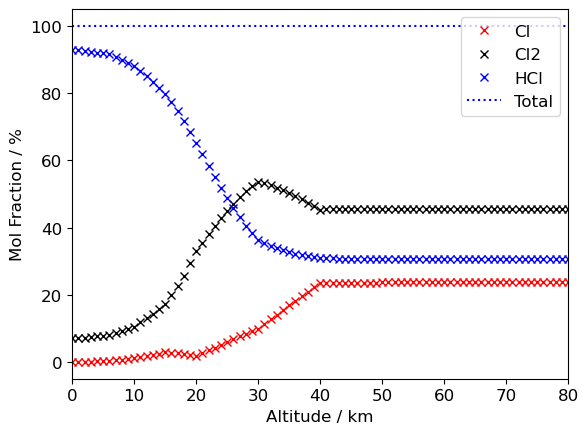

In [5]:
# Plot the molar fraction.
plt.plot(alt_extended,mol_cl/total_mol[0]*100,'xr',label="Cl")
plt.plot(alt_extended,mol_cl2/total_mol[0]*100,'xk',label="Cl2")
plt.plot(alt_extended,mol_hcl/total_mol[0]*100,'xb',label="HCl")
plt.plot(alt_extended,total_mol/total_mol[0]*100,':b',label="Total")
plt.xlim(0,80)
#plt.ylim(0,100)
plt.xlabel("Altitude / km")
plt.ylabel("Mol Fraction / %")
plt.legend(loc="upper right")

## Output for main script

In [6]:
import pandas as pd
param_hcl = np.append(param_hcl,[0,0,0,0]) 
df = pd.DataFrame(
    {
        "Alt": alt_extended,
        "HCl": mass_frac_hcl,
        "Cl2": mass_frac_cl2,
        "Cl":  mass_frac_cl,
    }
)
df.to_csv("./chlorine_pei.csv", float_format='%.5f')